In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import itertools as it
import collections
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt

/home/ytanigaw/.conda/envs/pgenlib/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# LD block on chr20 in UKBB population
- LD block structure is computed with plink1.9 `--blocks` option

```
[ytanigaw@sh-102-07 ~]$ /share/PI/mrivas/bin/plink --bfile /share/PI/mrivas/ukbb/download/chr20impv1 --memory 80000 --blocks-max-kb 1000 --blocks-min-maf .001 --out /share/PI/mrivas/ukbb/download/chr20impv1-max1mbp-minmaf001 --blocks no-pheno-req
PLINK v1.90b3.45 64-bit (13 Jan 2017)      https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /share/PI/mrivas/ukbb/download/chr20impv1-max1mbp-minmaf001.log.
Options in effect:
  --bfile /share/PI/mrivas/ukbb/download/chr20impv1
  --blocks no-pheno-req
  --blocks-max-kb 1000
  --blocks-min-maf .001
  --memory 80000
  --out /share/PI/mrivas/ukbb/download/chr20impv1-max1mbp-minmaf001

257674 MB RAM detected; reserving 80000 MB for main workspace.
1619597 variants loaded from .bim file.
152249 people (0 males, 0 females, 152249 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/share/PI/mrivas/ukbb/download/chr20impv1-max1mbp-minmaf001.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152249 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate is 0.995355.
1619597 variants and 152249 people pass filters and QC.
Note: No phenotypes present.
--blocks: 36577 haploblocks written to
/share/PI/mrivas/ukbb/download/chr20impv1-max1mbp-minmaf001.blocks .
Extra block details written to
/share/PI/mrivas/ukbb/download/chr20impv1-max1mbp-minmaf001.blocks.det .
Longest span: 153.665kb.
```

In [3]:
block_det = '/share/PI/mrivas/ukbb/download/chr20impv1-max1mbp-minmaf001.blocks.det'

In [4]:
block = pd.read_table(block_det, delimiter='\s+')

In [5]:
block.head()

,CHR,BP1,BP2,KB,NSNPS,SNPS
0,20,60828,61098,0.271,2,rs187713677|rs6078030
1,20,61795,62731,0.937,3,rs4814683|rs192879424|rs34147676
2,20,63244,67184,3.941,14,rs6139074|rs115017123|rs75670495|rs1418258|rs7...
3,20,67500,67760,0.261,2,rs112142516|rs113878089
4,20,68618,68749,0.132,2,rs75510087|rs6086616


## box plot

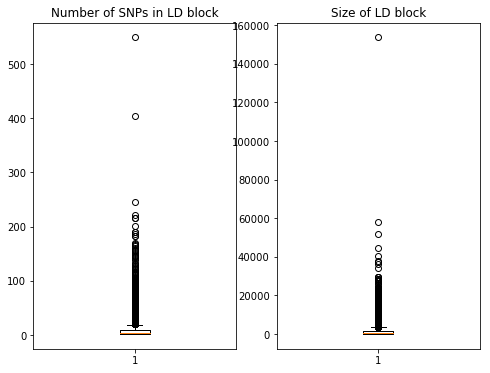

In [6]:
fig = plt.figure(figsize=(8,6))
axs = [fig.add_subplot(1, 2, i+1) for i in range(2)]
axs[0].set_title('Number of SNPs in LD block')
axs[0].boxplot(block['NSNPS'])
axs[1].set_title('Size of LD block')
axs[1].boxplot(block['BP2'] - block['BP1'])
fig.savefig('chr20impv1-max1mbp-minmaf001.blocks.det.boxplot.png')

## box plot (log10 scale)

/home/ytanigaw/.conda/envs/pgenlib/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


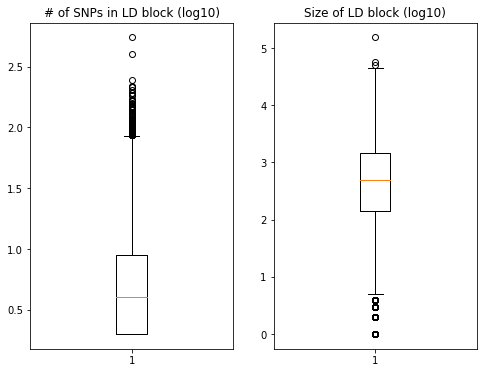

In [8]:
fig_log = plt.figure(figsize=(8,6))
axs_log = [fig_log.add_subplot(1, 2, i+1) for i in range(2)]
axs_log[0].set_title('# of SNPs in LD block (log10)')
axs_log[0].boxplot(np.log(block['NSNPS']) / np.log(10))
axs_log[1].set_title('Size of LD block (log10)')
axs_log[1].boxplot(np.log(block['BP2'] - block['BP1']) / np.log(10))
fig_log.savefig('chr20impv1-max1mbp-minmaf001.blocks.det.boxplot_log.png')

## Note: maf >= .001 filter
- We have used `.001` as a cutoff for minor allele frequency. This filter reduced the number of SNP marks from 1.6 M to 300 K

In [9]:
!wc -l /share/PI/mrivas/ukbb/download/chr20impv1.bim

1619597 /share/PI/mrivas/ukbb/download/chr20impv1.bim


In [10]:
np.sum(block['NSNPS'])

299421